# KNN (K-Nearest Neighbors)


**K-Nearest Neighbors (KNN)** is a supervised machine learning algorithm used for classification and regression tasks.

It works by finding the **k most similar data points (nearest neighbors)** to a target data point and using their labels/values to make a prediction. 

The algorithm is based on the **idea that similar data points are close together in feature space**, and thus the labels/values of nearby data points can be used to make predictions about the target data point. 

**The choice of k is important**, as it affects the accuracy and robustness of the algorithm. A small value of k can result in overfitting, while a large value of k can result in underfitting.


<img src="https://towardsdatascience.com/wp-content/uploads/2020/08/1NMTvXlbr_h3L2s_L3qhvQA.png"/>

In [ ]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read dataset
#df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df= pd.read_csv('2_4_breast_cancer_wisconsin_dataset.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


breast-cancer-wisconsin.data(19.89 kB)
About this file: # link: https://www.kaggle.com/datasets/saurabhbadole/breast-cancer-wisconsin-state

1. Sample code number: Unique identifier for each tissue sample.
2. Clump Thickness: Assessment of the thickness of tumor cell clusters (1 - 10).
3. Uniformity of Cell Size: Uniformity in the size of tumor cells (1 - 10).
4. Uniformity of Cell Shape: Uniformity in the shape of tumor cells (1 - 10).
5. Marginal Adhesion: Degree of adhesion of tumor cells to surrounding tissue (1 - 10).
6. Single Epithelial Cell Size: Size of individual tumor cells (1 - 10).
7. Bare Nuclei: Presence of nuclei without surrounding cytoplasm (1 - 10).
8. Bland Chromatin: Assessment of chromatin structure in tumor cells (1 - 10).
9. Normal Nucleoli: Presence of normal-looking nucleoli in tumor cells (1 - 10).
10. Mitoses: Frequency of mitotic cell divisions (1 - 10).
11. *Class (target): Classification of tumor type (2 for benign, 4 for malignant).

In [9]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
#conver column names to lowercase
col_names_lower = [name.lower() for name in col_names]
print(col_names_lower)

['id', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']


In [11]:
#set column names to dataset
df.columns = col_names_lower
df.head()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
# drop id column
df.drop('id', axis=1, inplace=True)
df.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [13]:
# EDA
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clump_thickness              699 non-null    int64 
 1   uniformity_cell_size         699 non-null    int64 
 2   uniformity_cell_shape        699 non-null    int64 
 3   marginal_adhesion            699 non-null    int64 
 4   single_epithelial_cell_size  699 non-null    int64 
 5   bare_nuclei                  699 non-null    object
 6   bland_chromatin              699 non-null    int64 
 7   normal_nucleoli              699 non-null    int64 
 8   mitoses                      699 non-null    int64 
 9   class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [15]:
# see the distribution of bare_nuclei object type
df['bare_nuclei'].value_counts()

bare_nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [16]:
df[df['bare_nuclei']=='?']

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [17]:
# set ? as 0 numreic value
df['bare_nuclei'] = df['bare_nuclei'].replace('?', 0)
df['bare_nuclei'].value_counts()

bare_nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
0      16
9       9
7       8
6       4
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clump_thickness              699 non-null    int64 
 1   uniformity_cell_size         699 non-null    int64 
 2   uniformity_cell_shape        699 non-null    int64 
 3   marginal_adhesion            699 non-null    int64 
 4   single_epithelial_cell_size  699 non-null    int64 
 5   bare_nuclei                  699 non-null    object
 6   bland_chromatin              699 non-null    int64 
 7   normal_nucleoli              699 non-null    int64 
 8   mitoses                      699 non-null    int64 
 9   class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [19]:
# change data type to int
df['bare_nuclei'] = df['bare_nuclei'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              699 non-null    int64
 1   uniformity_cell_size         699 non-null    int64
 2   uniformity_cell_shape        699 non-null    int64
 3   marginal_adhesion            699 non-null    int64
 4   single_epithelial_cell_size  699 non-null    int64
 5   bare_nuclei                  699 non-null    int64
 6   bland_chromatin              699 non-null    int64
 7   normal_nucleoli              699 non-null    int64
 8   mitoses                      699 non-null    int64
 9   class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [21]:
# Class: Classification of tumor type (2 for benign, 4 for malignant).
df['class'].value_counts()

class
2    458
4    241
Name: count, dtype: int64

In [22]:
# lets change bening as 0 and malignant as 1
df['class'] = df['class'].replace(2, 0)
df['class'] = df['class'].replace(4, 1)

In [23]:
df.sample(5)

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
562,1,1,1,1,2,1,3,1,1,0
592,10,3,4,5,3,10,4,1,1,1
96,2,1,1,2,2,1,1,1,1,0
126,7,5,3,7,4,10,7,5,5,1
330,10,4,7,2,2,8,6,1,1,1


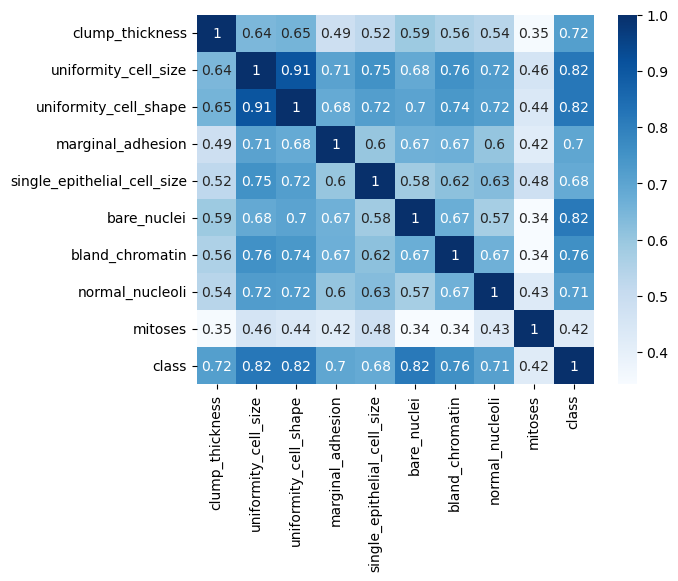

In [24]:
# see the all realtions with heatmap seaborn
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [25]:
# X and y variables
X = df.drop('class', axis=1)
y = df['class']
X.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [28]:
y.sample(5)

690    0
157    0
230    1
471    0
474    0
Name: class, dtype: int64

In [29]:
# split dataset as train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 9)
(140, 9)
(559,)
(140,)


In [ ]:
# scale data with standartscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# create KNN classifier model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# predict with test data
y_pred = knn.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0])

In [33]:
# check accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9714285714285714


In [34]:
# see classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98        85
           1       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

Confusion Matrix:
[[82  3]
 [ 1 54]]


-----------------

## Hyper Parameteres with GridsearchCV

In [ ]:
# Use hyperparameters with GridsearchCV to understand which k best
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

y_pred = grid_search.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'n_neighbors': 5}
Best Score: 0.9624678249678249
Accuracy: 0.9714285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98        85
           1       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

Confusion Matrix:
[[82  3]
 [ 1 54]]



## Elbow method explanation 

* The **elbow method is a visual method for determining the optimal number of clusters (k) in a dataset**. 

* It involves plotting the distortion measure (e.g. sum of squared errors) against the number of clusters. 

* **The point at which the rate of decrease of distortion is most dramatic is considered as the optimum number** of clusters.



<img src="https://miro.medium.com/v2/resize:fit:670/0*aY163H0kOrBO46S-.png"/>

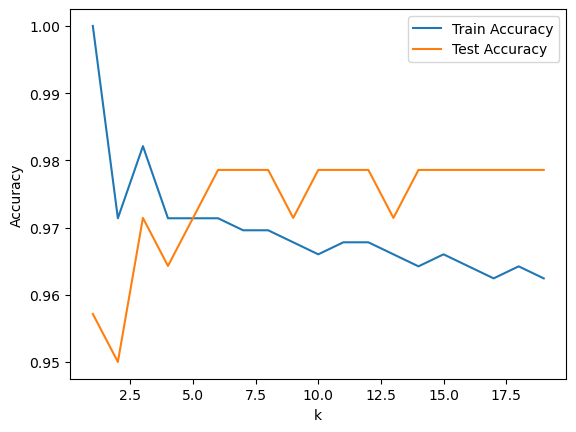

In [ ]:
# let's draw our elbow  graph
import matplotlib.pyplot as plt

k_values = range(1, 21)
train_accuracy = []
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_accuracy.append(knn.score(X_train_scaled, y_train))
    test_accuracy.append(knn.score(X_test_scaled, y_test))

plt.plot(k_values, train_accuracy, label='Train Accuracy')
plt.plot(k_values, test_accuracy, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

k = 1, Accuracy = 0.9571
k = 2, Accuracy = 0.9500
k = 3, Accuracy = 0.9714
k = 4, Accuracy = 0.9643
k = 5, Accuracy = 0.9714
k = 6, Accuracy = 0.9786
k = 7, Accuracy = 0.9786
k = 8, Accuracy = 0.9786
k = 9, Accuracy = 0.9714
k = 10, Accuracy = 0.9786
k = 11, Accuracy = 0.9786
k = 12, Accuracy = 0.9786
k = 13, Accuracy = 0.9714
k = 14, Accuracy = 0.9786
k = 15, Accuracy = 0.9786
k = 16, Accuracy = 0.9786
k = 17, Accuracy = 0.9786
k = 18, Accuracy = 0.9786
k = 19, Accuracy = 0.9786
k = 20, Accuracy = 0.9714
k = 21, Accuracy = 0.9714
k = 22, Accuracy = 0.9714
k = 23, Accuracy = 0.9714
k = 24, Accuracy = 0.9714
k = 25, Accuracy = 0.9714
k = 26, Accuracy = 0.9643
k = 27, Accuracy = 0.9714
k = 28, Accuracy = 0.9643
k = 29, Accuracy = 0.9714
k = 30, Accuracy = 0.9714


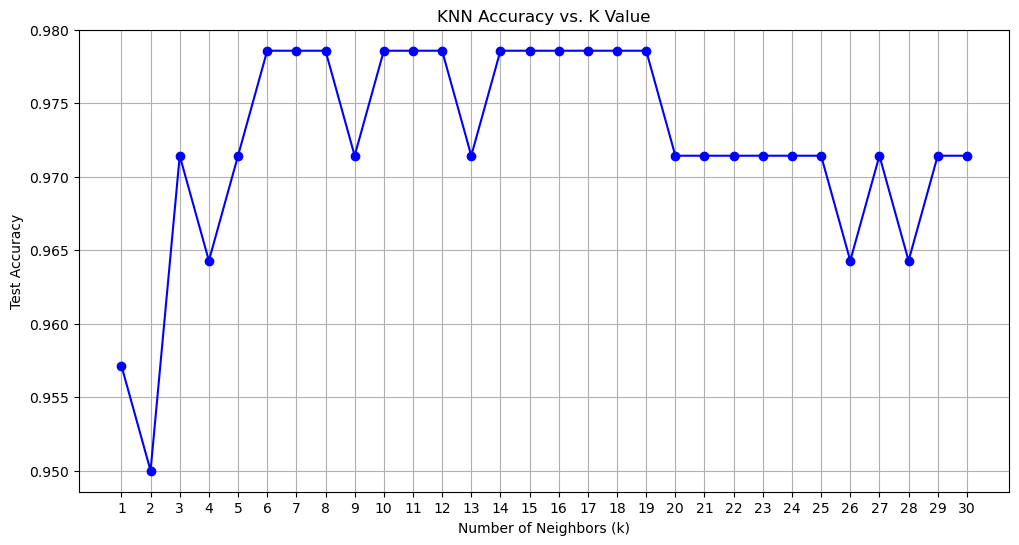


Optimal k value for highest accuracy (0.9786): 6


In [42]:
# alternative code
import matplotlib.pyplot as plt

# List of 'k' values to try
k_values = list(range(1, 31)) # We'll try k from 1 to 30

# List to store accuracy scores on the test set for each 'k' value
accuracies = []

for k in k_values:
    # Create a KNN classifier instance
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model with the training data
    knn.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test_scaled) 

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k = {k}, Accuracy = {accuracy:.4f}")

# Plot the Performance Graph (Elbow-like Graph) ---
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.xticks(np.arange(1, 31, 1)) # Show x-axis ticks for every integer k value
plt.grid(True)
plt.show()

# --- 5. Find the Best 'k' Value ---
best_k_index = np.argmax(accuracies)
best_k = k_values[best_k_index]
best_accuracy = accuracies[best_k_index]

print(f"\nOptimal k value for highest accuracy ({best_accuracy:.4f}): {best_k}")

## KNN Regressor


**KNN Regressor** is a supervised learning algorithm that can be used for **regression** problems. It is based on the **k-nearest neighbors** algorithm, where the **target value** of a new data point is predicted by finding the **k most similar neighbors** and taking the **weighted average** of their target values. 

The **weights** of the neighbors are typically calculated using a **distance metric** such as **Euclidean distance** or **Manhattan distance**. The **k value** is a hyperparameter that needs to be tuned for optimal performance.

<img src="https://miro.medium.com/1*t2R5j_XOGNN7bT-lNKBARA.png" style="width:600px; height:400px"/>

<img src="https://lh5.googleusercontent.com/proxy/9g6N-pZQrlRaH0BQ95ibLVlFQd6QZzEYxDOio9EaouihdSI0weTd3jzrOADtGNqDPvK0XSzb_Hl_lcAsL1K3_RRcyM1d" style="width:400px; height:400px"/>

In [43]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# import machine learning libraries and functions
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [45]:
# read dataset
df=pd.read_csv('2_4_house_energy_regression_dataset.csv')
df

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530
...,...,...,...
995,-0.753965,-0.280675,-33.182365
996,-2.172670,0.847422,-71.059718
997,0.302635,-0.754276,3.260515
998,0.381935,0.430042,42.654703


**Dataset Explanation: house_energy_regression_dataset***

This dataset contains daily measurements for predicting a house's energy usage.

* avg_indoor_temp_change: How much the indoor temperature changed (normalized).
* outdoor_humidity_level: The level of humidity outside (normalized).
* *daily_energy_consumption_kwh (target): The total energy consumed by the house in kilowatt-hours (kWh) – this is the target you'd typically want to predict.
* Goal: Predict daily energy consumption based on indoor temperature changes and outdoor humidity.

In [46]:
# Understanda Dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_indoor_temp_change        1000 non-null   float64
 1   outdoor_humidity_level        1000 non-null   float64
 2   daily_energy_consumption_kwh  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
count,1000.000000,1000.000000,1000.000000
mean,0.033186,0.056982,1.766025
std,0.961603,1.014959,41.299085
min,-3.241267,-2.940389,-132.797922
25%,-0.611581,-0.651418,-25.600072
50%,0.036043,0.047742,1.065474
75%,0.648317,0.714886,28.766573
max,3.078881,3.852731,138.577662


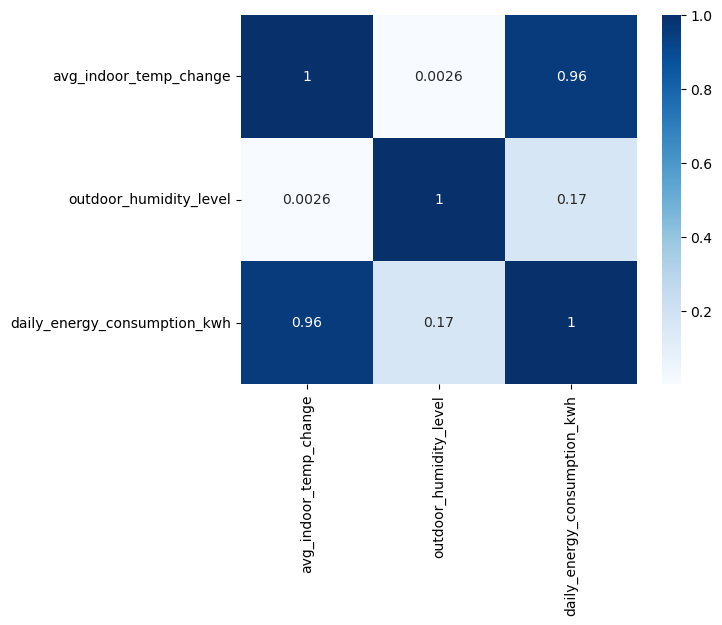

In [47]:
# see the relations with heatmap seaborn
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [52]:
df.columns

Index(['avg_indoor_temp_change', 'outdoor_humidity_level',
       'daily_energy_consumption_kwh'],
      dtype='object')

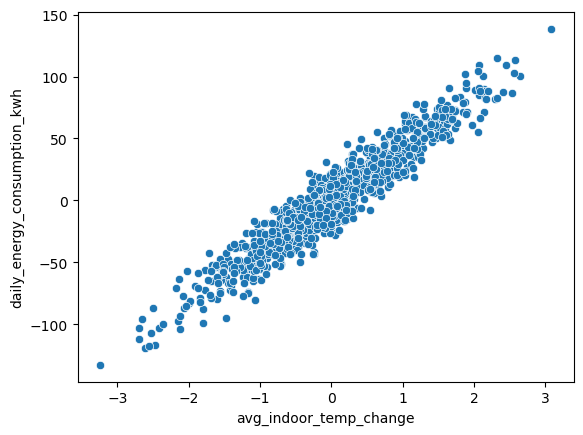

In [53]:
# see the scatter plot
sns.scatterplot(x='avg_indoor_temp_change', y='daily_energy_consumption_kwh', data=df)
plt.show()

<Axes: xlabel='outdoor_humidity_level', ylabel='daily_energy_consumption_kwh'>

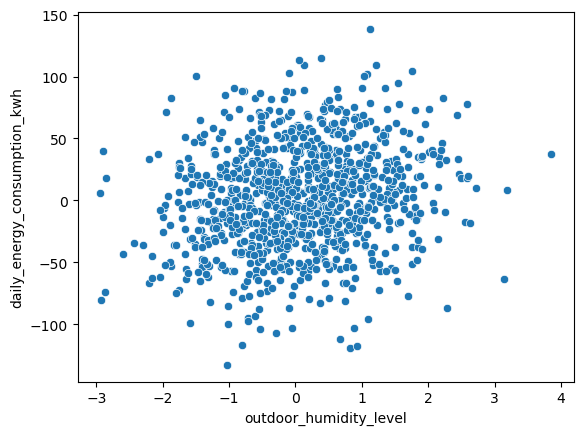

In [54]:
sns.scatterplot(x='outdoor_humidity_level', y='daily_energy_consumption_kwh', data=df)

In [55]:
# X and y variables
X = df[['avg_indoor_temp_change', 'outdoor_humidity_level']]
y = df['daily_energy_consumption_kwh']

In [56]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


In [57]:
# Create a KNN Regressor model
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [58]:
# predict
y_pred = knn.predict(X_test)
y_pred

array([ 4.20500342e+01, -3.47506993e+00, -1.47827117e+01, -1.03360170e+01,
        3.82974252e+01,  1.92371012e+01,  6.16662624e+01, -2.85111863e+01,
       -7.50277644e+01, -1.48427402e+01,  1.73366953e+01, -1.56308912e+01,
       -6.62629937e+01,  5.54242414e+01,  2.07645282e+01, -7.14798768e-02,
       -5.62424769e+01,  2.51844892e+01, -3.08846826e+01,  2.57061947e+01,
        2.48275056e+01,  1.63223801e+01, -2.51265503e+01, -4.14939254e+01,
       -4.61230571e+01,  1.98775010e+01, -6.27668559e+01,  6.18168660e+01,
       -2.01642693e+01,  7.26779405e+01, -7.66802917e+01,  3.81607924e+01,
       -6.80013710e+01, -4.54031146e+00, -5.20808073e+01, -2.98372326e+00,
        1.65489766e+01,  3.54234420e+01,  1.49468438e+01, -4.87093436e+01,
        9.43761656e+01,  2.89270606e+01,  3.85149990e+01, -7.53899367e+01,
        2.22444050e+01,  1.54622949e+01, -3.52765425e+01, -2.48805521e+00,
        6.07617199e+01,  6.73725834e+01,  6.66247363e+01,  7.81152129e+01,
       -5.83785641e+01, -

In [62]:
# see the metrics of KNN Regressor
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 9.197295365662564
MSE: 137.9754130488282
R2: 0.91481812854151


----END-----